In [22]:
%load_ext autoreload
%autoreload 2
import fmuSimulation.gymFMUchecker as gymFMUChecker

import os
from fmuSimulation.configReader import configReader
import numpy as np
import sys
import matplotlib.pyplot as plt

config = os.path.abspath('Example.cfg')
cfg = configReader(config)
config = cfg.getMulti(cfg.getSections())
config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


{'DEFAULT': {},
 'General': {'DEBUG': False, 'LOG': False, 'Href': 10},
 'FMU': {'fmuPath': '../../matlab/03-Watertank/rlwatertank.fmu',
  'startTime': 0,
  'stopTime': 10,
  'tolerance': 1e-06,
  'createFMU': False,
  'dt': 0.01},
 'Reinforcement Learning': {'actionInterval': 10000000},
 'Ray': {'num_workers': 20,
  'num_gpus': 1,
  'ignore_worker_failures': False,
  'recreate_failed_workers': False,
  'framework': 'torch'},
 'Environment': {},
 'Reward': {}}

In [23]:
if False:
    from fmuSimulation.createFMU import createFMU
    createFMU(config)
env = gymFMUChecker.FMUchecker(config)

Incompatible sample time and stop time.
 Using 10.0 as stop time instead
Incompatible sample time and action interval.
 Using 10000000.0 as interval instead


In [24]:
env.fmu.getInput()


[ScalarVariable(name='Control.Kidmy', type='Real', clocks=[], dimensions=[], dimensionValueReferences=[]),
 ScalarVariable(name='Control.Kpdmy', type='Real', clocks=[], dimensions=[], dimensionValueReferences=[]),
 ScalarVariable(name='Control.uctrl', type='Real', clocks=[], dimensions=[], dimensionValueReferences=[]),
 ScalarVariable(name='Control.ref', type='Real', clocks=[], dimensions=[], dimensionValueReferences=[])]

In [25]:
env.fmu.getOutput()


[ScalarVariable(name='Measurement.height', type='Real', clocks=[], dimensions=[], dimensionValueReferences=[]),
 ScalarVariable(name='Measurement.error', type='Real', clocks=[], dimensions=[], dimensionValueReferences=[]),
 ScalarVariable(name='Measurement.errorIntegral', type='Real', clocks=[], dimensions=[], dimensionValueReferences=[])]

In [26]:
for Kp in np.linspace(1,50,10):
    for Ki in np.linspace(0,30,10):
        for i in range(1):
            done = False
            #Kp = 10
            #Ki = 1e-6
            obs = env.reset()
            while not done:
                #action = obs[0] * Kp + obs[1] * Ki
                #print(action)
                obs, reward, done, _ = env.step( np.array([Ki, Kp]))
                print(f'Kp: {Kp}\n Ki: {Ki}\n {reward}\n')


        #fig = plt.figure()
        #ax = fig.subplots()

        ##ax.plot(env.times, env.outputs[:,0], label='error')
        #ax.legend()



Kp: 1.0
 Ki: 0.0
 -100.01061248779297

Kp: 1.0
 Ki: 3.3333333333333335
 -107.46145629882812

Kp: 1.0
 Ki: 6.666666666666667
 -449.0855712890625

Kp: 1.0
 Ki: 10.0
 -303.5432434082031

Kp: 1.0
 Ki: 13.333333333333334
 -371.50469970703125

Kp: 1.0
 Ki: 16.666666666666668
 -229.78466796875

Kp: 1.0
 Ki: 20.0
 -545.6051025390625

Kp: 1.0
 Ki: 23.333333333333336
 -244.1911163330078

Kp: 1.0
 Ki: 26.666666666666668
 -776.1192626953125

Kp: 1.0
 Ki: 30.0
 -383.6737060546875

Kp: 6.444444444444445
 Ki: 0.0
 -115.73626708984375

Kp: 6.444444444444445
 Ki: 3.3333333333333335
 -33.555419921875

Kp: 6.444444444444445
 Ki: 6.666666666666667
 -55.41039276123047

Kp: 6.444444444444445
 Ki: 10.0
 -2.931464195251465

Kp: 6.444444444444445
 Ki: 13.333333333333334
 -173.92706298828125

Kp: 6.444444444444445
 Ki: 16.666666666666668
 -51.56025695800781

Kp: 6.444444444444445
 Ki: 20.0
 -138.8111114501953

Kp: 6.444444444444445
 Ki: 23.333333333333336
 -53.516822814941406

Kp: 6.444444444444445
 Ki: 26.6666

In [27]:
env.getObservationSpace().contains(np.full([1,1001], 0, dtype=np.float32))

True

In [28]:
env.customVars['ctrlInt']

array([4141.82], dtype=float32)

AttributeError: 'FMUchecker' object has no attribute 'u'

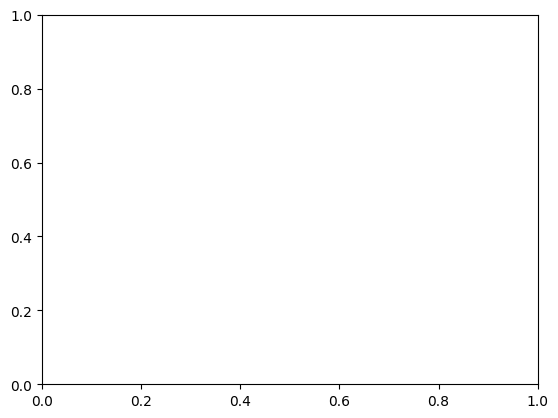

In [29]:
fig = plt.figure()
ax = fig.subplots()

ax.plot(env.times[:], env.u)

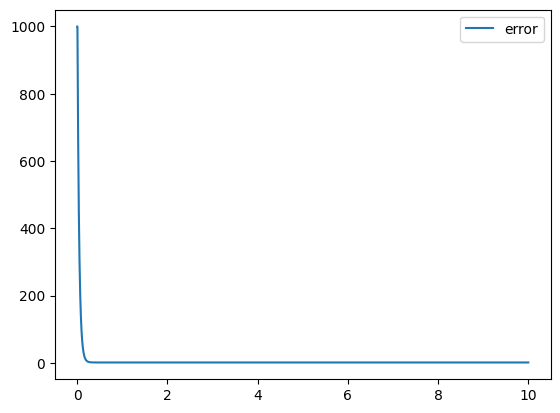

In [ ]:

fig = plt.figure()
ax = fig.subplots()

ax.plot(env.times[1:], env.inputs[1:,2], label='error')
ax.legend()

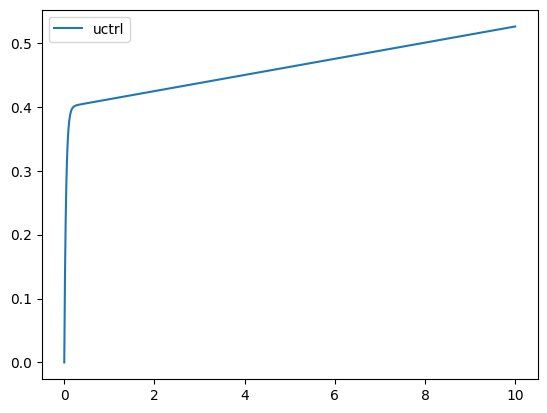

In [ ]:
fig = plt.figure()
ax = fig.subplots()

ax.plot(env.times[:], env.outputs[:,2], label='uctrl')
ax.legend()

In [ ]:
fig = plt.figure()
ax = fig.subplots()

ax.plot(env.times[:], env.inputs[:,2], label='uctrl')
ax.legend()
e=

SyntaxError: invalid syntax (1098408525.py, line 6)

In [ ]:
for i in range(100000):
    env.getReward(action,obs)

In [ ]:
env.inputs

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+01],
       [1.00000000e-03, 1.00000000e+02, 1.00000000e+03, 1.00000000e+01],
       [1.00000000e-03, 1.00000000e+02, 1.00000001e+03, 1.00000000e+01],
       ...,
       [1.00000000e-03, 1.00000000e+02, 1.26411215e+00, 1.00000000e+01],
       [1.00000000e-03, 1.00000000e+02, 1.26411215e+00, 1.00000000e+01],
       [1.00000000e-03, 1.00000000e+02, 1.26411215e+00, 1.00000000e+01]])

In [ ]:
env.outputs

array([[ 0.        , 10.        ,  0.        ],
       [ 0.        , 10.        ,  0.01      ],
       [ 0.25      ,  9.75      ,  0.02      ],
       ...,
       [ 9.98736413,  0.01263587,  0.52552912],
       [ 9.98736413,  0.01263587,  0.52554175],
       [ 9.98736413,  0.01263587,  0.52555439]])

In [ ]:
env.times

array([[1.0000e-03],
       [2.0000e-03],
       [3.0000e-03],
       ...,
       [9.9990e+00],
       [1.0000e+01],
       [1.0001e+01]])

In [ ]:
env.stepCount

10000